<a href="https://colab.research.google.com/github/Rishu-aery/Deep_learning/blob/main/CNN_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)


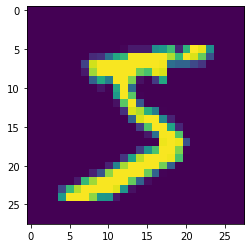

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,train_labels),(x_test,test_labels)=mnist.load_data()
first_img=x_train[0]
print('x_train.shape:',x_train.shape)
print('x_test.shape:',x_test.shape)
plt.imshow(first_img)
plt.show()

In [3]:
import keras
train_images=x_train.reshape(60000,28,28,1)
test_images=x_test.reshape(10000,28,28,1)

train_images,test_images=train_images/255.0,test_images/255.0

model=tf.keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [4]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=1)

1875/1875 [==============================] - 42s 21ms/step - loss: 0.2532 - accuracy: 0.9208


313/313 [==============================] - 3s 8ms/step - loss: 0.0875 - accuracy: 0.9724
0.9724000096321106


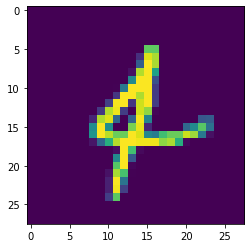

In [5]:
test_loss,test_acc= model.evaluate(test_images,test_labels)
print(test_acc)

test_images=np.expand_dims(test_images[300],axis=0)
plt.imshow(test_images.reshape(28,28))
plt.show()

In [8]:
result=model.predict(test_images)
result

array([[8.7914495e-06, 6.9372274e-04, 3.4451034e-04, 6.1451405e-04,
        9.9119204e-01, 2.4797709e-04, 4.6654427e-03, 2.6242065e-05,
        9.1357692e-04, 1.2931674e-03]], dtype=float32)